# Fitzpatrick Skin Photoype Classification

### Import Libraries

In [ ]:
#!pip install visualkeras

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten,Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import visualkeras
from sklearn.metrics import confusion_matrix , classification_report

### Load Data

In [ ]:
train_set=pd.read_csv("fitz_undersampled_train_final.csv")

In [ ]:
test_set=pd.read_csv("fitz_undersampled_test_final.csv")

In [ ]:
train_set['phototype']=train_set['phototype'].astype(str)

In [ ]:
test_set['phototype']=test_set['phototype'].astype(str)

### Data Augmentation

In [ ]:
datagen=ImageDataGenerator(rescale=1./255)
train_generator=datagen.flow_from_dataframe(dataframe=train_set, directory='train', x_col="file", y_col="phototype", class_mode="categorical", target_size=(150,150))

valid_generator=datagen.flow_from_dataframe(dataframe=test_set, directory='val', x_col="file", y_col="phototype", class_mode="categorical", target_size=(150,150))


C:\Users\Mohan\anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 6 invalid image filename(s) in x_col="file". These filename(s) will be ignored.
  warnings.warn(


Found 35424 validated image filenames belonging to 5 classes.
Found 4515 validated image filenames belonging to 5 classes.


### Build Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))


Compile Model

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

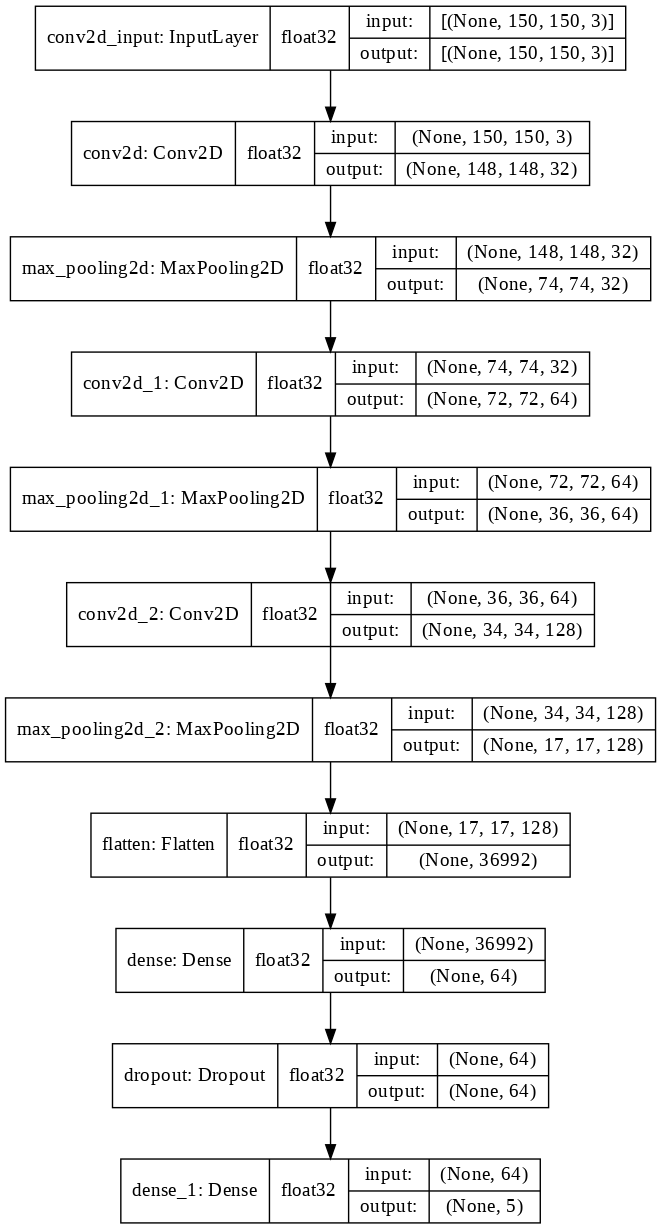

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True, show_dtype = True, show_layer_names = True, rankdir="TB", expand_nested = True, dpi = 100)

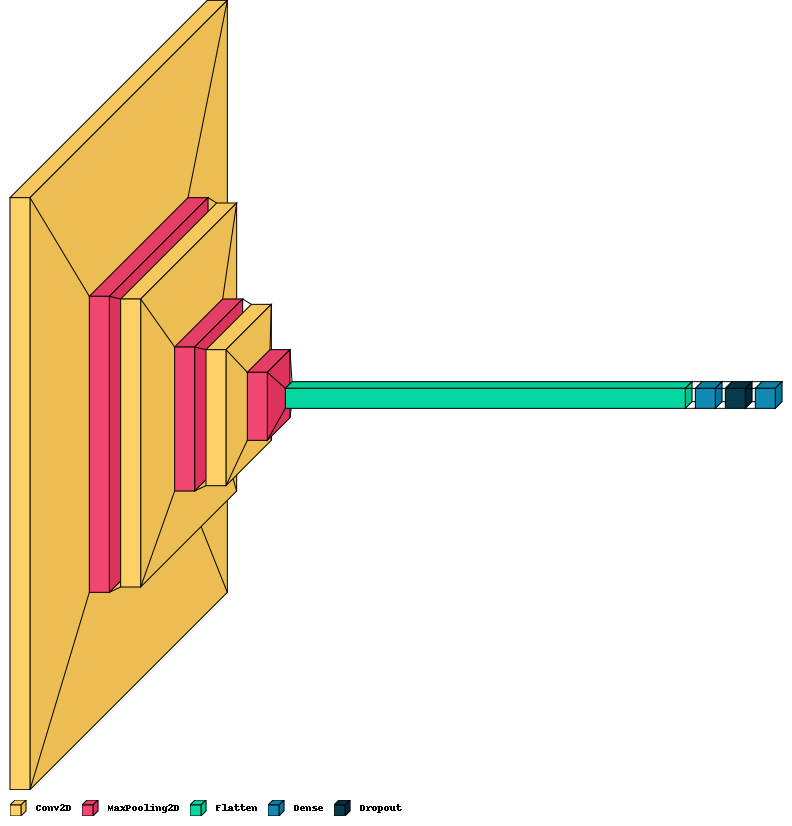

In [ ]:
visualkeras.layered_view(model, legend=True,to_file='output.png')

Set Checkpoints & Callbacks

In [ ]:
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_fitz_model.h5',
                                                  monitor='val_loss', mode='max',
                                                 verbose=0)
File = 'fitz_categories'
callback = [Checkpoint, 
             tf.keras.callbacks.EarlyStopping(patience = 5, monitor= "val_acc",verbose=1),
             tf.keras.callbacks.TensorBoard(log_dir = "logs/{}".format(File))]

### Train Model

In [ ]:
history = model.fit(train_generator,validation_data=valid_generator,
                    batch_size = 128,
                    epochs = 50,
                    callbacks=[callback])

Epoch 1/50
1107/1107 [==============================] - 832s 722ms/step - loss: 1.4727 - accuracy: 0.3474 - val_loss: 1.3271 - val_accuracy: 0.4430
Epoch 2/50
1107/1107 [==============================] - 62s 56ms/step - loss: 1.3210 - accuracy: 0.4312 - val_loss: 1.2328 - val_accuracy: 0.4819y: 0.43
Epoch 3/50
1107/1107 [==============================] - 61s 55ms/step - loss: 1.2528 - accuracy: 0.4631 - val_loss: 1.1817 - val_accuracy: 0.4979
Epoch 4/50
1107/1107 [==============================] - 62s 56ms/step - loss: 1.2073 - accuracy: 0.4854 - val_loss: 1.1689 - val_accuracy: 0.5156
Epoch 5/50
1107/1107 [==============================] - 63s 57ms/step - loss: 1.1691 - accuracy: 0.5045 - val_loss: 1.1368 - val_accuracy: 0.5344
Epoch 6/50
1107/1107 [==============================] - 63s 57ms/step - loss: 1.1299 - accuracy: 0.5210 - val_loss: 1.1271 - val_accuracy: 0.5355
Epoch 7/50
1107/1107 [==============================] - 63s 57ms/step - loss: 1.1000 - accuracy: 0.5335 - val_loss:

Epoch 29/50
1107/1107 [==============================] - 66s 60ms/step - loss: 0.6834 - accuracy: 0.7058 - val_loss: 1.7058 - val_accuracy: 0.5293
Epoch 30/50
1107/1107 [==============================] - 67s 60ms/step - loss: 0.6772 - accuracy: 0.7088 - val_loss: 1.6111 - val_accuracy: 0.5378
Epoch 31/50
1107/1107 [==============================] - 67s 60ms/step - loss: 0.6636 - accuracy: 0.7124 - val_loss: 1.6340 - val_accuracy: 0.5391
Epoch 32/50
1107/1107 [==============================] - 70s 63ms/step - loss: 0.6587 - accuracy: 0.7157 - val_loss: 1.7102 - val_accuracy: 0.5404
Epoch 33/50
1107/1107 [==============================] - 70s 63ms/step - loss: 0.6488 - accuracy: 0.7173 - val_loss: 1.8511 - val_accuracy: 0.5422
Epoch 34/50
1107/1107 [==============================] - 71s 64ms/step - loss: 0.6439 - accuracy: 0.7220 - val_loss: 1.8401 - val_accuracy: 0.5309
Epoch 35/50
1107/1107 [==============================] - 71s 64ms/step - loss: 0.6397 - accuracy: 0.7210 - val_loss: 1

In [ ]:
#model.save("fitz.h5")

Evaluate Model

In [ ]:
test_accuracy = model.evaluate(valid_generator, verbose=2)

142/142 - 4s - loss: 2.3234 - accuracy: 0.5212


Plot Performance Graphs

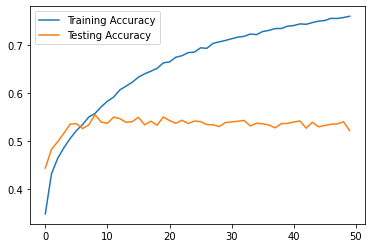

In [ ]:
plt.plot(history.history["accuracy"] , label = "Training Accuracy")
plt.plot(history.history["val_accuracy"] , label = "Testing Accuracy")
plt.legend()
plt.show()

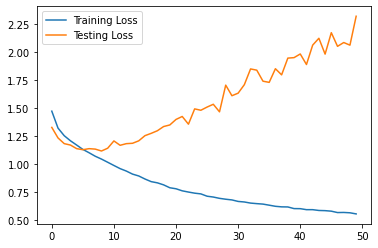

In [ ]:
plt.plot(history.history["loss"] , label = "Training Loss")
plt.plot(history.history["val_loss"] , label = "Testing Loss")
plt.legend()
plt.show()

### Obtain Predictions

Create dictionary of target label classes.

In [ ]:
fitz_dict = valid_generator.class_indices
low_fitz_dict = {v:i.lower().capitalize()for i, v in fitz_dict.items()}
        

In [ ]:
Y_pred  = model.predict(valid_generator,verbose=1)

142/142 [==============================] - 4s 29ms/step


### Generate Confusion Matrix

In [ ]:
result = np.around(Y_pred)
result1=result.argmax(axis=1)
valid_labels=valid_generator.classes

In [ ]:
cm=confusion_matrix(valid_generator.classes, result1)

<AxesSubplot:>

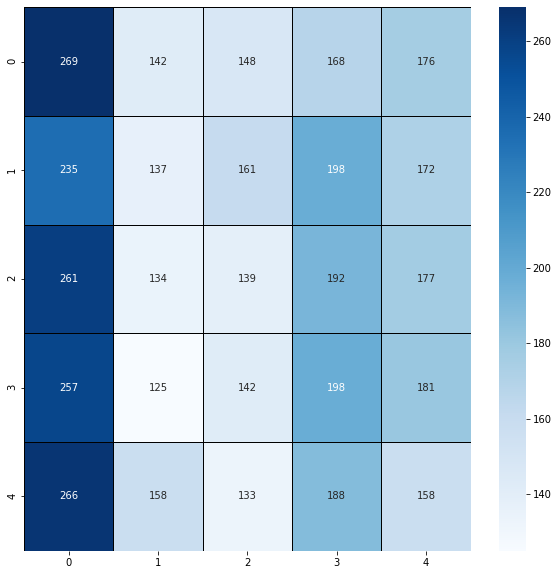

In [ ]:
import seaborn as sns
cm = pd.DataFrame(cm , index = [i for i in range(5)] , columns = [i for i in range(5)])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

### Generate Classification Report

In [ ]:
print(classification_report(valid_generator.classes,result1, target_names=fitz_dict))

              precision    recall  f1-score   support

      I & II       0.21      0.30      0.25       903
         III       0.20      0.15      0.17       903
          IV       0.19      0.15      0.17       903
           V       0.21      0.22      0.21       903
          VI       0.18      0.17      0.18       903

    accuracy                           0.20      4515
   macro avg       0.20      0.20      0.20      4515
weighted avg       0.20      0.20      0.20      4515

